In [1]:
import xarray as xr

In [2]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [3]:
t_mean= ds.air.mean("time")
t_var = ds.air.var("time")

In [4]:
t_var.to_dataframe().describe()

,air
count,1325.000000
mean,81.940491
std,86.214417
min,0.972623
25%,8.344398
50%,35.959637
75%,152.555099
max,284.303009


In [5]:
from matplotlib import pyplot as plt
import cartopy

In [6]:
t_var

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[137.99417  , 136.74919  , 136.85487  , ..., 113.815346 ,
        116.037964 , 118.68822  ],
       [135.89319  , 136.77396  , 138.8306   , ..., 119.04803  ,
        122.46915  , 121.53224  ],
       [154.61653  , 162.80054  , 171.03596  , ..., 127.841995 ,
        120.51134  , 106.67887  ],
       ...,
       [  2.5820408,   2.4192162,   2.1497264, ...,   3.161138 ,
          3.4683871,   3.8007338],
       [  1.7022152,   1.6127477,   1.5700948, ...,   3.0996234,
          3.6539   ,   4.1556134],
       [  1.0736613,   1.0997931,   1.076634 , ...,   3.0756862,
          3.4166942,   3.7071688]], dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

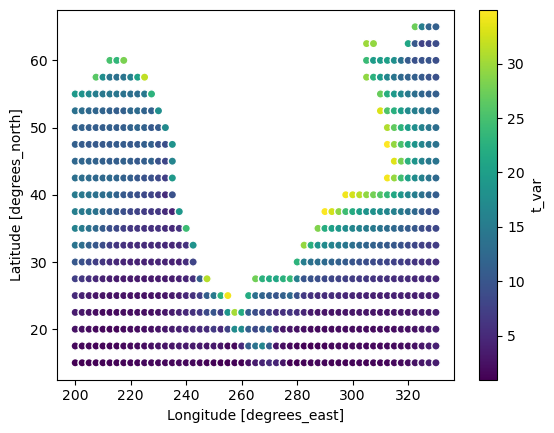

In [7]:
t_var.to_dataset(name="t_var").where(t_var < 35).plot.scatter(x="lon", y="lat", hue="t_var")

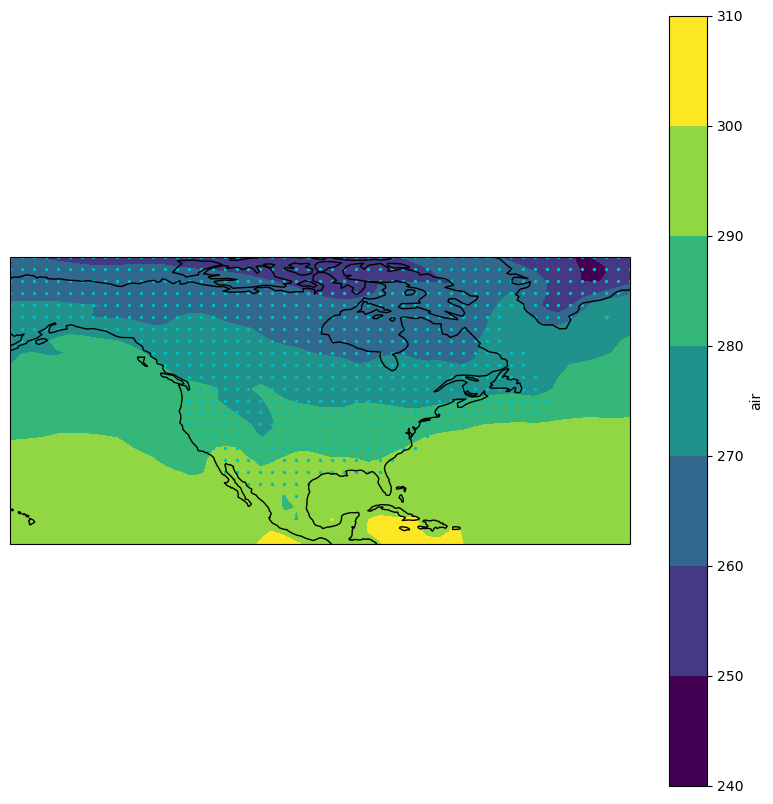

In [8]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": cartopy.crs.PlateCarree()}, figsize=(10, 10))

t_mean.plot.contourf(ax=ax, transform=cartopy.crs.PlateCarree())
dots = (t_var > 35).to_dataframe().reset_index()
dots = dots.where(dots.air).dropna()
dots.plot.scatter(x="lon", y="lat", c="c", s=2, ax=ax, transform=cartopy.crs.PlateCarree())

ax.coastlines();